# **Assignment 1: Titanic Disaster Survivability Prediction using ML**

# Step-1 : Describe the data used and how you got the data

Titanic - Machine Learning from Disaster. Predict survival on the Titanic and get familiar with ML basics

All data collected from this linke (https://www.kaggle.com/c/titanic/data). There is three type of data (train.csv, test.csv, gender_submission.csv). Here train.csv file contails original data of all pessenger who survived or not also known as ground truth. Then test.csv file contains similar data but doesnt ground truth. Now our job is to predict for each pessenger survival or not from train.csv using train model to test.csv

This is classification problem where we have to predict yes or not.

In [3]:
import numpy as np                                             # to perform numerical operation
import pandas as pd   

# Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithm                             
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Load data from csv file
test_df = pd.read_csv("test.csv")                              # test data
train_df = pd.read_csv("train.csv")                            # train Data

# **Step-2 : Initial Exploration of the data (print data, visualize data). Find number of attributes, number of records in the data. Also find if there is any attribute which has missing data.**

# **Print And Visualize Train Dataset**

In [5]:
train_df.head()  # print First 5 data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail(5)  #   print Last 5 data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.shape   #size of dataset shape

(891, 12)

In [8]:
print(train_df.columns.values)  # Attributes of Dataset

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.describe()   # Describing of dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.info()      #number of records in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


On column Age 177 data missing it's approxmately 20%, on column name cabin 687 data missing it's approxmately 77% and Embarked has 2 misisng data.

# **Print And Visualize test Dataset**

In [11]:
test_df.head()  #  print First 5 data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test_df.tail(5)  #  print Last 5 data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
test_df.shape   #size of dataset shape

(418, 11)

In [14]:
print(test_df.columns.values)  # Attributes of Dataset

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [15]:
test_df.describe()   # Describing of dataset

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
test_df.info()      #   number of records in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


On column Age 86 data missing it's approxmately 23%, on column name cabin 322 data missing it's approxmately 79% and Fare has 1 misisng data.

# **Step-3: Find correlation of data attributes and target variable (whether survived or not) to explore which attributes have most effects.**

In [17]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

Text(0, 0.5, 'Survived Frequency (Normalized)')

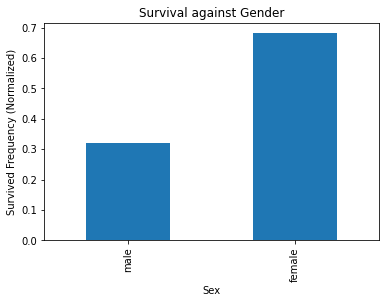

In [18]:
train_df["Age"] = train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))   #fill missing data using 
train_df['Sex'][train_df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')


It is clear that survival rate for men is much lower than womens.

Text(0, 0.5, 'Frequency')

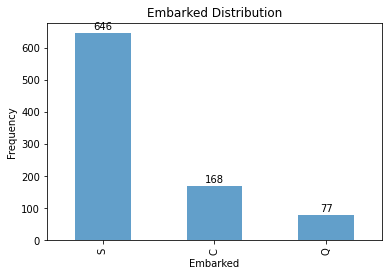

In [89]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')    # Fill Mising value
ax = train_df['Embarked'].value_counts().plot(kind='bar', alpha=0.7)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height,
            ha='center', va='bottom')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Ticket Class vs Survival')

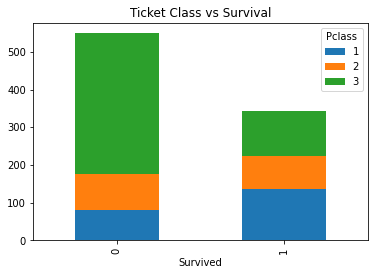

In [22]:
train_df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

This plot shows that the people with first class ticket had more surviving count than dying while scenario was opposite for passengers of class 3.

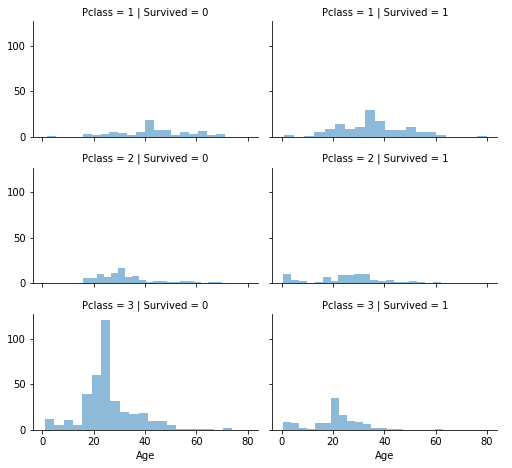

In [23]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Text(0, 0.5, 'Normalized Count')

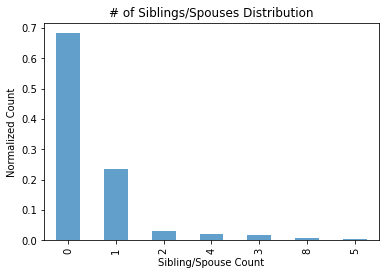

In [24]:
train_df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Most of the passengers travelled alone, that is why most frequency came for Siblings/Spouse count 0.

Text(0, 0.5, 'Normalized Count')

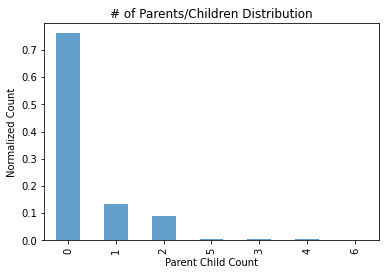

In [25]:
train_df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Normalized Count')

Most of the people neither travelled with parents or children.

Text(0, 0.5, 'Count')

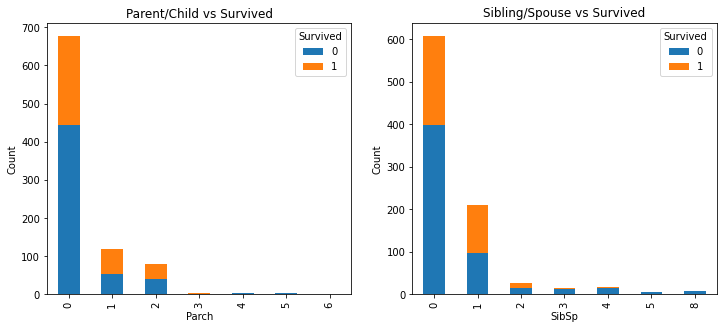

In [26]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
train_df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
train_df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

These two bar chart indicate if passenger accompanied by either soupse/siblings or parents/child, chances of survival were higher than who board the ship alone.

Text(0, 0.5, 'Frequency')

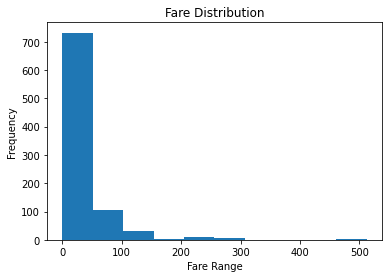

In [27]:
train_df['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

We can see most of the ticket price was within range of 50.

We have explored how the values for different features distributed. Lets see how Age variable depends on other features.

Text(0.5, 1.0, 'Age vs Female vs Class3')

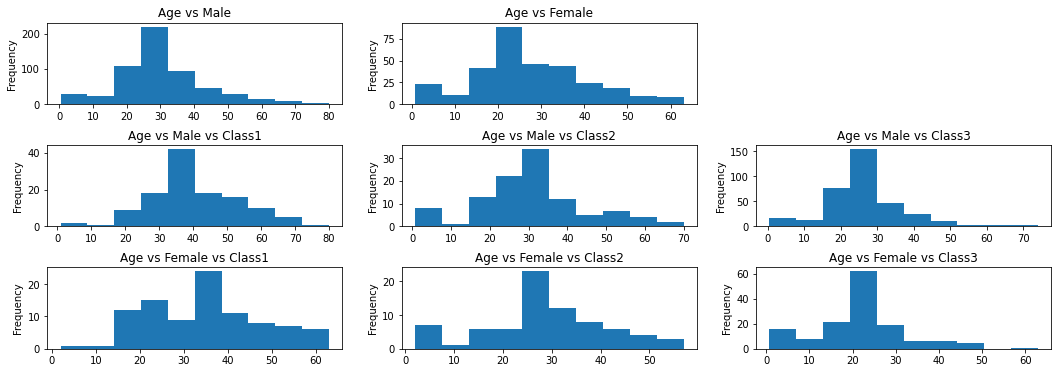

In [28]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
train_df['Age'][(train_df['Sex']=='male')].plot(kind='hist')
plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
train_df['Age'][(train_df['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')
plt.subplot2grid((3,3), (1,0))
train_df['Age'][(train_df['Sex']=='male') & (train_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Male vs Class1')
plt.subplot2grid((3,3), (1,1))
train_df['Age'][(train_df['Sex']=='male') & (train_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Male vs Class2')
plt.subplot2grid((3,3), (1,2))
train_df['Age'][(train_df['Sex']=='male') & (train_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Male vs Class3')
plt.subplot2grid((3,3), (2,0))
train_df['Age'][(train_df['Sex']=='female') & (train_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Female vs Class1')
plt.subplot2grid((3,3), (2,1))
train_df['Age'][(train_df['Sex']=='female') & (train_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Female vs Class2')
plt.subplot2grid((3,3), (2,2))
train_df['Age'][(train_df['Sex']=='female') & (train_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Female vs Class3')

From the first row it looks like Age range varies differently based on gender. And in next two rows indicate Age range distribution differs not only based on gender but also with ticket class

We are going to calculate the median age of passengers who are grouped by ticket class and sex. And assign those median to null values present in those corresponding groups.

# **Step-4: Compute any new attribute/feature from existing attributes [if necessary]. Explain how these new features contribute to the prediction of target variable.**

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Except Cabin, none of the feature is having Null value.

In [30]:
train_df.drop('Cabin',
  axis='columns', inplace=True)

More than 75% data missing on cabin colum so we drop this colums

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In previous graph we have seen, both Sibsp and Parch are having similar influence on Survival. Lets calculate if passenger travelled alone or with family. Instead of 2 separate features, lets combine SibSp and Parch and create a new feature named FamilySize.

In [32]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

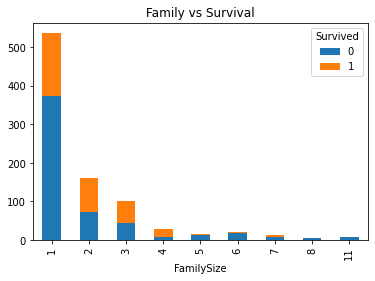

In [33]:
train_df.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')

It says if passenger travelled with family, chances of survival were higher than people travelled alone.

We have already filled null value with corresponding median value and created new feature named FamilySize. Lets see how this modified dataset looks

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Lets load the test data and check if any missing value

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age, Fare and Cabin have missing value. Lets ignore Cabin as we are not going to use that feature. We have to fill the missing value with median of existing values.

And we have to add 'FamilySize', the new feature introduced as part of Feature Engineering

In [36]:
test_df["Age"] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].dropna().median())   
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

Lets check how test data looks like.

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [38]:
test_df.drop('Cabin',
  axis='columns', inplace=True)

So many data missing on cabin columns so we drop this column

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


As PassengerId, Name, Ticket will not help to predict whether Survived or not, we are going to ignore those features. We have already ignored Cabin. And as we have created new feature out of SibSp and ParCh, we are not going include those features as well.

# **Step -5: Select your classification model (try at least three model to find best one)**

We have to apply one hot encoding for categorical variables like Sex, Embarked and Pclass. Lets create X_train and X_test.

In [40]:
X_train = train_df[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test_df[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
Y_train = train_df['Survived'].values

Lets see how X_train looks like

In [41]:
X_train.head(5)

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,2,0,0,1,0,1,0,0,1
1,38.0,71.2833,2,1,0,0,1,0,1,0,0
2,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,35.0,53.1000,2,1,0,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,1,0,1,0,0,1


Its time to create model. Lets start with Classifier

In [91]:
# Decision Tree
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train, Y_train)
Y_pred = Decision_tree.predict(X_test)
acc_decision_tree = round(Decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.09

In [57]:
# Random Forest
Random_forest = RandomForestClassifier(n_estimators=100)
Random_forest.fit(X_train, Y_train)
Y_pred = Random_forest.predict(X_test)
Random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.09

In [58]:
Knn = KNeighborsClassifier(n_neighbors = 3)
Knn.fit(X_train, Y_train)
Y_pred = Knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

# **Step-6: Perform cross validation of training data in all cases and run test data to decide which model is best.**

To evaluate our model we are using cross_val_score with k-fold where k = 5.

Using this model we will get the predicted Survival on test data.

In [96]:
scores = cross_val_score(Knn, X_train, Y_train, cv=5)
print("KNeighborsClassifier Score for cross validation: ", round(np.mean(scores*100)))

KNeighborsClassifier Score for cross validation:  72


In [98]:
scores = cross_val_score(Decision_tree, X_train, Y_train, cv=5)
print("DecisionTreeClassifier Score for cross validation: ", round(np.mean(scores*100)))

DecisionTreeClassifier Score for cross validation:  78


In [100]:
scores = cross_val_score(Random_forest, X_train, Y_train, cv=5)
print("RandomForestClassifier Score for cross validation: ", round(np.mean(scores*100)))

RandomForestClassifier Score for cross validation:  81


After cross validation output score for Random forest classifier result is best Score.

# **Step-7: Try techniques like Grid Search to further fine tune model. Examine whether fine tuning improve your prediction performance.**

We will select random forest classifier foir grid search.

Grid search allows us to do this for multiple parameters simultaneously. We will select a few different parameters that we want to tune, and for each one we will provide a few different values to try out. Then grid search will fit models to every possible combination of these parameter values and use cross-validation to assess the performance in each case.

Furthermore, since we are using CV, we don't need to keep a separate validation set.

# **Number of estimators and max depth**

We will start by tuning the n_estimators (number of trees in the forest) and the max_depth (how deep each tree grows) parameters.

The first step that we need to do is to define the grid of parameters over which to search:

In [65]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

The good news is that SkLearn's grid search allows us to run the job in parallel. Including the n_jobs=-1 argument below let's grid search run on all of the available cores on the host machine.

In [66]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   54.5s finished


Now let's take a look at the results of the grid search.

In [84]:
grid_result.best_params_

{'bootstrap': True, 'max_features': 8}

In [85]:
grid_result.best_score_

0.8271604938271605

But let's take a look at all of the models so we can make a more informed decision

In [69]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.822671 using {'max_depth': 10, 'n_estimators': 2000}
0.794613 (0.024742) with: {'max_depth': None, 'n_estimators': 10}
0.793490 (0.014108) with: {'max_depth': None, 'n_estimators': 100}
0.796857 (0.020634) with: {'max_depth': None, 'n_estimators': 1000}
0.799102 (0.019309) with: {'max_depth': None, 'n_estimators': 2000}
0.815937 (0.021354) with: {'max_depth': 5, 'n_estimators': 10}
0.817059 (0.012698) with: {'max_depth': 5, 'n_estimators': 100}
0.817059 (0.012698) with: {'max_depth': 5, 'n_estimators': 1000}
0.817059 (0.012698) with: {'max_depth': 5, 'n_estimators': 2000}
0.819304 (0.035456) with: {'max_depth': 10, 'n_estimators': 10}
0.817059 (0.030654) with: {'max_depth': 10, 'n_estimators': 100}
0.821549 (0.026512) with: {'max_depth': 10, 'n_estimators': 1000}
0.822671 (0.022391) with: {'max_depth': 10, 'n_estimators': 2000}
0.795735 (0.024793) with: {'max_depth': 20, 'n_estimators': 10}
0.792368 (0.012992) with: {'max_depth': 20, 'n_estimators': 100}
0.796857 (0.020634) wit

# **Leaf size**

The min_samples_leaf argument controls the size of the leaves in the trees.

We will set out the grid in a similar manner as before, only this time we will use the max_depth and n_estimators parameters that we found above.

In [70]:
# create the grid
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.3s finished


In [71]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.824916 using {'min_samples_leaf': 2}
0.822671 (0.022391) with: {'min_samples_leaf': 1}
0.824916 (0.028964) with: {'min_samples_leaf': 2}
0.820426 (0.023381) with: {'min_samples_leaf': 3}
0.820426 (0.011111) with: {'min_samples_leaf': 4}
0.814815 (0.012598) with: {'min_samples_leaf': 5}
0.814815 (0.010997) with: {'min_samples_leaf': 6}


# **To bag or not to bag**

Bootstrap aggregating (or bagging) is a special case of the random forest where we bootstrap (sample with replacement) from the n training obersvations to create a new training set of size n for each tree. Furthermore, each tree considers all variables when making each split.

We can use grid search to determine if bootstrapping will be an appropriate method to use.

In [72]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# create the model with new leaf size
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


In [73]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827160 using {'bootstrap': True, 'max_features': 8}
0.826038 (0.020634) with: {'bootstrap': True, 'max_features': 5}
0.827160 (0.017887) with: {'bootstrap': True, 'max_features': 8}
0.824916 (0.016722) with: {'bootstrap': True, 'max_features': 10}
nan (nan) with: {'bootstrap': True, 'max_features': 12}
0.823793 (0.018305) with: {'bootstrap': True, 'max_features': None}
0.822671 (0.024640) with: {'bootstrap': False, 'max_features': 5}
0.804714 (0.024435) with: {'bootstrap': False, 'max_features': 8}
0.800224 (0.015141) with: {'bootstrap': False, 'max_features': 10}
nan (nan) with: {'bootstrap': False, 'max_features': 12}
0.790123 (0.011111) with: {'bootstrap': False, 'max_features': None}


# **Make Predictions on Test**

Finally, we can attempt to predict which passengers in the test set survived.

In [74]:
rf = grid_result.best_estimator_

In [75]:
# test our Cross validation score
cross_val_score(rf, X_train, Y_train, cv=5).mean()

0.8294457347310276

Previous score was 81 so there we can see improve our score

In [99]:
test_df['Survived'] = rf.predict(X_test)

In [83]:
solution = test_df[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
solution.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Output Final Predictions

In [102]:
solution.to_csv("Solution.csv", index=False)